# 1)필요한 라이브러리 호출

In [29]:
#데이터 분석
import numpy as np
import pandas as pd



#시각화 (%matplotlib inline은 rich output(음성, 사진, 영상)을 notebook에서 바로 볼 수 있게 해준다고 함)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline               



#경고 무시
import warnings
warnings.filterwarnings('ignore')

# 2)데이터 불러오고 살펴보기

In [30]:
#csv파일인 train과 test를 pd.read_csv를 통해 불러옵니다.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


#.describe() 메소드는 생성했던 DataFrame 의 간단한 통계 정보를 보여줍니다
#include="all"을 넣어주면 전부 보여줌
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Aubart, Mme. Leontine Pauline",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 3)데이터 분석하기

In [31]:
#승객의 어떤 정보(인덱스)들이 있는지 알아봅시다.
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [32]:
#변수들에 대한 아이디어를 얻기 위해 샘플을 5개 추출합니다.
train.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S


각각의 값을 어떤 유형으로 취하는지에 따라 분류합니다
- Numerical Features(숫자): Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
- Categorical Features(단정적인): Survived, Sex, Embarked, Pclass
- Alphanumeric Features(문자+숫자): Ticket, Cabin

데이터 타입은 어떤지 살펴봅니다.
- survived: int
- Pclass:   int
- Name:     str
- Sex:      str
- Age:      float
- SibSp:    int
- Parch:    int
- Ticket:   int
- Fare:     float
- Cabin:    str
- Embarked: str

In [33]:
#이제 이 정보를 가지고 다시 데이터를 관찰해봅시다.
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Aubart, Mme. Leontine Pauline",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


다음과 같은 관찰을 얻어낼 수 있습니다. (위의 자료에서 어떻게 알아냈나?)
- 승객은 총 891명이다.
- Age 값의 약 19.8%가 유실되었다. (나이는 생존의 중요한 요소이기 때문에 이 gap을 fill하려는 시도를 해야합니다.)
- Cabin 값의 약 77.1%가 유실되었다. (너무 많이 유실되어서 채우기 힘드니까 버린다.)
- Embarked 값은 0.22% 밖에 유실되지 않았다. (넣어도 무해하다)

In [34]:
#누락된 값의 개수
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


몇가지 예측
- sex: 여성이 생존에 더 유리했을 것이다.
- SibSp/Parch: 혼자 여행하는 사람이 생존에 유리했을 것이다.
- Age: 어릴수록 생존에 유리했을 것이다.
- Pclass: 사회경제적으로 더 높은 사람이 생존에 유리했을 것이다.(1 = 1st, 2 = 2nd, 3 = 3rd)

# 4)시각화(visualization)

### Sex features

Percentage of males who survived: 18.890814558058924
Percentage of females who survived: 74.20382165605095


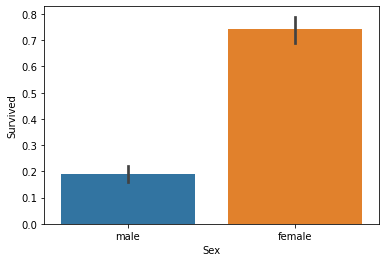

In [35]:
# seaborn을 이용해 막대 그래프(bar plot)를 그린다
sns.barplot(x = "Sex", y= "Survived", data = train)

#남성과 여성의 생존 비율을 출력한다.생존했으면 survived가 1이므로 값이 유효할 것이고 죽었으면 0이라 반영 안 됨
print("Percentage of males who survived:", train["Survived"][train["Sex"]=='male'].value_counts(normalize=True)[1]*100)
print("Percentage of females who survived:", train["Survived"][train["Sex"]=='female'].value_counts(normalize=True)[1]*100)

#### 예측대로 female의 생존률이 높았다

-1 True 대신 False를 넣는다면?
    비율이 아닌 개수가 나온다. (True: 상대 비율, False: 개수)

-2 [1]이 없으면?
    우리가 원하는 값의 비율이 아닌 다른 값의 비율도 나온다. 그 값 중 우리가 원하는 값만 골라주는 인덱스이다.

-3 100을 곱하는 이유?
    우리가 익숙한 %의 값으로 보기 위해. (없으면 소수점만 나온다)

### Pclass features

Percentage of 1st class who survived: 62.96296296296296
Percentage of 2nd class who survived: 47.28260869565217
Percentage of 3rd class who survived: 24.236252545824847


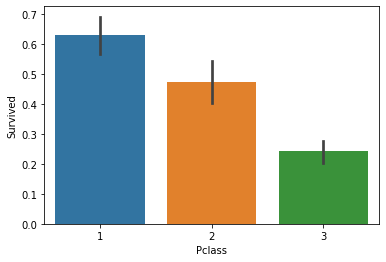

In [36]:
#bar plot을 그린다.
sns.barplot(x = "Pclass", y = "Survived", data=train)
#클래스별로 생존 확률을 숫자로 표현해준다.
print("Percentage of 1st class who survived:", train["Survived"][train["Pclass"]==1].value_counts(normalize=True)[1]*100)
print("Percentage of 2nd class who survived:", train["Survived"][train["Pclass"]==2].value_counts(normalize=True)[1]*100)
print("Percentage of 3rd class who survived:", train["Survived"][train["Pclass"]==3].value_counts(normalize=True)[1]*100)

#### 예측대로 사회경제적 지위가 높을 수록 생존률이 높았다. (62.9% vs. 47.3% vs. 24.2%)

### SibSp features (siblings, spouses)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


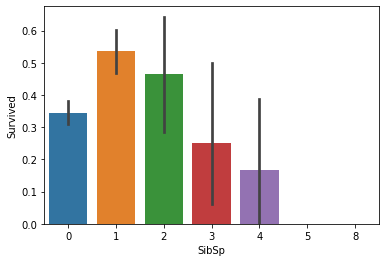

In [37]:
#막대그래프 그리기
sns.barplot(x = "SibSp", y = "Survived", data=train)
#비율 구하기
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"]==0].value_counts(normalize=True)[1]*100)
print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"]==1].value_counts(normalize=True)[1]*100)
print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"]==2].value_counts(normalize=True)[1]*100)

일반적으로, 없는 편이 생존에 유리하긴 하였다.
하지만 예상 외로 하나나 둘은 있는 쪽이 생존률이 높았다. (34.5% vs 53.4% vs. 46.4%)

## Parch Feature (parents, children)

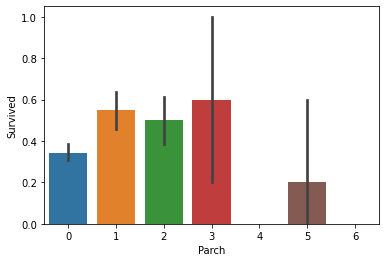

In [38]:
sns.barplot(x = "Parch", y = "Survived", data=train)

어째서인지 여기선 percentage를 쓰지 않았다. 일단 내가 써보았다.

In [39]:
print("Percentage of Parch = 0 who survived:", train["Survived"][train["Parch"]==0].value_counts(normalize=True)[1]*100)
print("Percentage of Parch = 1 who survived:", train["Survived"][train["Parch"]==1].value_counts(normalize=True)[1]*100)
print("Percentage of Parch = 2 who survived:", train["Survived"][train["Parch"]==2].value_counts(normalize=True)[1]*100)
print("Percentage of Parch = 3 who survived:", train["Survived"][train["Parch"]==3].value_counts(normalize=True)[1]*100)
print("Percentage of Parch = 5 who survived:", train["Survived"][train["Parch"]==5].value_counts(normalize=True)[1]*100)

Percentage of Parch = 0 who survived: 34.365781710914455
Percentage of Parch = 1 who survived: 55.08474576271186
Percentage of Parch = 2 who survived: 50.0
Percentage of Parch = 3 who survived: 60.0
Percentage of Parch = 5 who survived: 20.0


## Age Feature

<function matplotlib.pyplot.show(*args, **kw)>

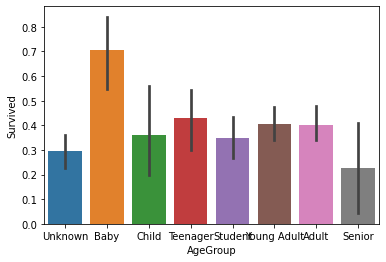

In [40]:
# 결측값은 음수로 채워서 뺴버립니다.
test["Age"]=test["Age"].fillna(-0.5)
train["Age"]=train["Age"].fillna(-0.5)
# np.inf의 역할은?  "60~"을 의미한다
# cut 명령을 사용하면 실수값을 다음처럼 카테고리 값으로 바꿀 수 있다. 
# bins 인수는 카테고리를 나누는 기준값이 된다. 영역을 넘는 값은 NaN으로 처리된다.
bins=[-1, 0, 5, 12, 18, 24, 35, 60,np.inf]
labels=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train["AgeGroup"] = pd.cut(train['Age'],bins,labels=labels)
test["AgeGroup"] = pd.cut(test['Age'],bins,labels=labels)

sns.barplot(x='AgeGroup',y='Survived',data=train)
plt.show

Baby는 다른 연령그룹에 비해 생존에 유리했다.

## Cabin Feature

객실 번호를 기록해둔 사람은 사회경제적 지위가 높았을 것이고, 그러므로 생존에 유리했을 것이다.

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


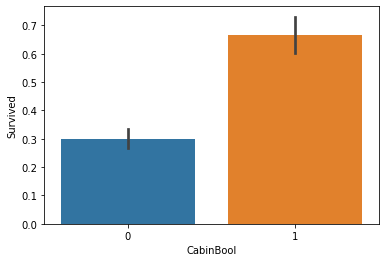

In [41]:
train["CabinBool"]=train["Cabin"].notnull().astype('int')
test["CabinBool"]=test["Cabin"].notnull().astype('int')
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize=True)[1]*100)
print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize=True)[1]*100)

sns.barplot(x="CabinBool", y="Survived",data=train)

객실이 기록된 사람은 확실히 생존률이 높았다.(66.6% vs 29.9$) 

# 5)Cleaning data

test의 값을 살펴봅시다.

In [42]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Herman, Mr. Samuel",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


- 총 418명의 승객이 있다.
- 요금(Fare)에 결측값이 하나 있다.
- 나이(Age)의 20.5%가 결측값이다.

## Cabin features

In [43]:
# Cabin 값들은 도움이 안되므로 버린다? 떼어낸다?
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

## Ticket features

In [44]:
#티켓도 별 쓸모가 없어 보이니 버려줍니다
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

## Embarked features

In [45]:
# Embarked features에서의 결측값을 채워야 합니다.
print("Number of people embarking in Southampton (S):")
Southampton = train[train["Embarked"]== "S"].shape[0]
print(Southampton)

print("Number of people embarking in Cherbourg (C):")
Cherbourg = train[train["Embarked"]== "C"].shape[0]
print(Cherbourg)

print("Number of people embarking in Queenstown (Q):")
Queenstown = train[train["Embarked"]== "Q"].shape[0]
print(Queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


대부분의 사람들이 S에서 탄 것을 알 수 있으니,결측값을 전부 S로 채워줍니다.

In [46]:
train = train.fillna({"Embarked":"S"})\

## Age features

결측값을 찾아야 하지만, 결측값의 비율이 매우 높으므로 하나의 값으로 결측값 전부를 채운다는 것은 비논리적입니다.
그 대신 예측하는 방법을 찾아봅시다.

In [47]:
#test 데이터셋과 train 데이터셋을 합쳐줍니다.
combine = [train, test]

# Title(Mr, Ms....)을 뽑아낸다.
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Syntax: Series.str.extract(pat, flags=0, expand=True)

Parameter


pat : Regular expression pattern with capturing groups.


flags : int, default 0 (no flags)


expand : If True, return DataFrame with one column per capture group.



Returns : DataFrame or Series or Index

In [48]:
#좀 더 쉽게 분류할 수 있게 몇가지 title을 그룹화합니다.
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [49]:
#각 그룹을 숫자로 치환합니다
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    #map함수는 시리즈의 값 하나하나에 접근해 함수를 수행한다.
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [22]:
# title 내에서 흔히 나오는 값을 이용해 결측값을 채운다.
mr_age = train[train["Title"] == 1]["AgeGroup"].mode()     # Young adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode()   # Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode()    # Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() # Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()  # Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode()   # Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#index 0부터 하나하나 AgeGroup이 Unknown이면  Title에 따라 age group을 채워준다
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

KeyError: 'Mr'

이제 결측값을 채웠으니, 각 연령 그룹을 숫자값으로 치환합니다

In [50]:
#AgeGroup에 맞는 숫자를 나눠준다
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#이제 Age features는 버려도 됩니다.
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

## Name features

In [51]:
#아까 Name에서 title을 추출했으니, 이제 버려줍니다.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

## Sex features

In [52]:
#Sex features도 숫자로 치환해줍니다.
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


## Embarked features

In [53]:
#Embarked features도 숫자로 치환해줍니다.
embarked_mapping = {"S" : 1, "C" : 2, "Q" : 3}
train["Embarked"]= train["Embarked"].map(embarked_mapping)
test["Embarked"]= test["Embarked"].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


## Fare features

fare values를 Pclass를 바탕으로 그룹화합니다

In [54]:
#Pclass를 기반으로 fare를 분류합니다.
for x in range(len(test["Fare"])):
    #만약 fare값이 null이라면
    if pd.isnull(test["Fare"][x]):
        #
        pclass = test["Pclass"][x] #Pclass = 3
        # round(필드이름,4)
        #.mean() 평균 구하는 함수  5째 자리에서 반올림한다
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#Fare values를 숫자로 그룹화한다.
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#Fare는 이제 버려도 된다.
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

잘 되었는지 확인해본다.

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [56]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


# 6) Choosing the best model

In [68]:
# training data의 22%를 이용해 정확도를 테스트해본다.
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

I will be testing the following models with my training data (got the list from here):

Gaussian Naive Bayes

Logistic Regression

Support Vector Machines


Perceptron


Decision Tree Classifier


Random Forest Classifier


KNN or k-Nearest Neighbors


Stochastic Gradient Descent


Gradient Boosting Classifier


For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

### Gaussian Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [59]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [60]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [61]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [63]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [64]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [65]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [66]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [67]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').